##Scrapping Google Apps Review - eg Mobile JKN
Week 2 NLP Pipeline PBA/ Genap 2025/ Irmasari Hafidz irma@its.ac.id

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [4]:
#Android App Mobile JKN  from Google Play at
#https://play.google.com/store/apps/details?id=app.bpjs.mobile&hl=id
#The apps ID found in the link after id=app.bpjs.mobile&hl=id
#The apps name on Google Play titled: MobileJKN dari Pemerintah Indonesia (Kemenkes)
#Dated 3 March 2025 and N of reviews 787K

from google_play_scraper import app, Sort, reviews_all

jkn_reviews = reviews_all(
    'com.google.android.apps.fitness',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [5]:
#Save Mobile JKN reviews into dataframe
df_googleFit = pd.DataFrame(np.array(jkn_reviews),columns=['content'])
df_googleFit = df_googleFit.join(pd.DataFrame(df_googleFit.pop('content').tolist()))
df_googleFit.to_csv(r'df_googleFit', index=False)

In [6]:
df_googleFit

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,83dcee2e-e62d-41a1-a5e2-15be5d43c4cc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Bakwas,1,0,2025.01.16.00.arm64-v8a.release,2025-03-05 06:44:06,None,NaT,2025.01.16.00.arm64-v8a.release
1,be0b5f0a-db77-4f0f-a8af-831466baa014,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,3,0,2025.01.16.00.arm64-v8a.release,2025-03-05 05:13:27,None,NaT,2025.01.16.00.arm64-v8a.release
2,2cec2253-f0f4-48f0-acc9-580bedbe4dc7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's accuracy not satisfactory,1,0,2025.02.13.00.arm64-v8a.release,2025-03-05 01:09:37,None,NaT,2025.02.13.00.arm64-v8a.release
3,2d5f1c52-a287-4f77-b82f-87e8e5b7e3ff,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Usefill app,5,0,2025.02.13.00.arm64-v8a.release,2025-03-05 00:52:52,None,NaT,2025.02.13.00.arm64-v8a.release
4,59a4c925-16c2-4ec4-ab77-83302c0bed28,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Some times note working,5,0,2025.01.16.00.arm64-v8a.release,2025-03-05 00:13:04,None,NaT,2025.01.16.00.arm64-v8a.release
...,...,...,...,...,...,...,...,...,...,...,...
83651,483c707f-48c8-4e5f-b782-70b954c3347f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Want to see where this goes. Should be intere...,4,0,1.50.51-000,2014-10-28 16:49:28,None,NaT,1.50.51-000
83652,af385cc5-c323-4c49-9a89-e39854533a23,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Happy to see more information about my daily e...,5,0,1.50.51-000,2014-10-28 16:46:28,None,NaT,1.50.51-000
83653,4913323a-503a-45d8-a308-ac92d91afe9a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Excellent, already have done 10 steps :)",5,1,1.50.51-000,2014-10-28 16:33:13,None,NaT,1.50.51-000
83654,667f9aaf-0698-4475-a916-828f3bf32246,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's Google so 5 stars :p,5,3,1.50.51-000,2014-10-28 16:29:08,None,NaT,1.50.51-000


In [7]:
df_googleFit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83656 entries, 0 to 83655
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              83656 non-null  object        
 1   userName              83656 non-null  object        
 2   userImage             83656 non-null  object        
 3   content               83637 non-null  object        
 4   score                 83656 non-null  int64         
 5   thumbsUpCount         83656 non-null  int64         
 6   reviewCreatedVersion  70985 non-null  object        
 7   at                    83656 non-null  datetime64[ns]
 8   replyContent          17009 non-null  object        
 9   repliedAt             17009 non-null  datetime64[ns]
 10  appVersion            70985 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 7.0+ MB


In [8]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_googleFit.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Bakwas,1,0,2025.01.16.00.arm64-v8a.release,2025-03-05 06:44:06,None,NaT
1,Nice,3,0,2025.01.16.00.arm64-v8a.release,2025-03-05 05:13:27,None,NaT
2,It's accuracy not satisfactory,1,0,2025.02.13.00.arm64-v8a.release,2025-03-05 01:09:37,None,NaT
3,Usefill app,5,0,2025.02.13.00.arm64-v8a.release,2025-03-05 00:52:52,None,NaT
4,Some times note working,5,0,2025.01.16.00.arm64-v8a.release,2025-03-05 00:13:04,None,NaT
...,...,...,...,...,...,...,...
83651,Want to see where this goes. Should be intere...,4,0,1.50.51-000,2014-10-28 16:49:28,None,NaT
83652,Happy to see more information about my daily e...,5,0,1.50.51-000,2014-10-28 16:46:28,None,NaT
83653,"Excellent, already have done 10 steps :)",5,1,1.50.51-000,2014-10-28 16:33:13,None,NaT
83654,It's Google so 5 stars :p,5,3,1.50.51-000,2014-10-28 16:29:08,None,NaT


In [9]:
#Check number of reviews scores
df_googleFit['score'].value_counts()

,count
score,
1,26939
5,22787
2,12573
3,11670
4,9687


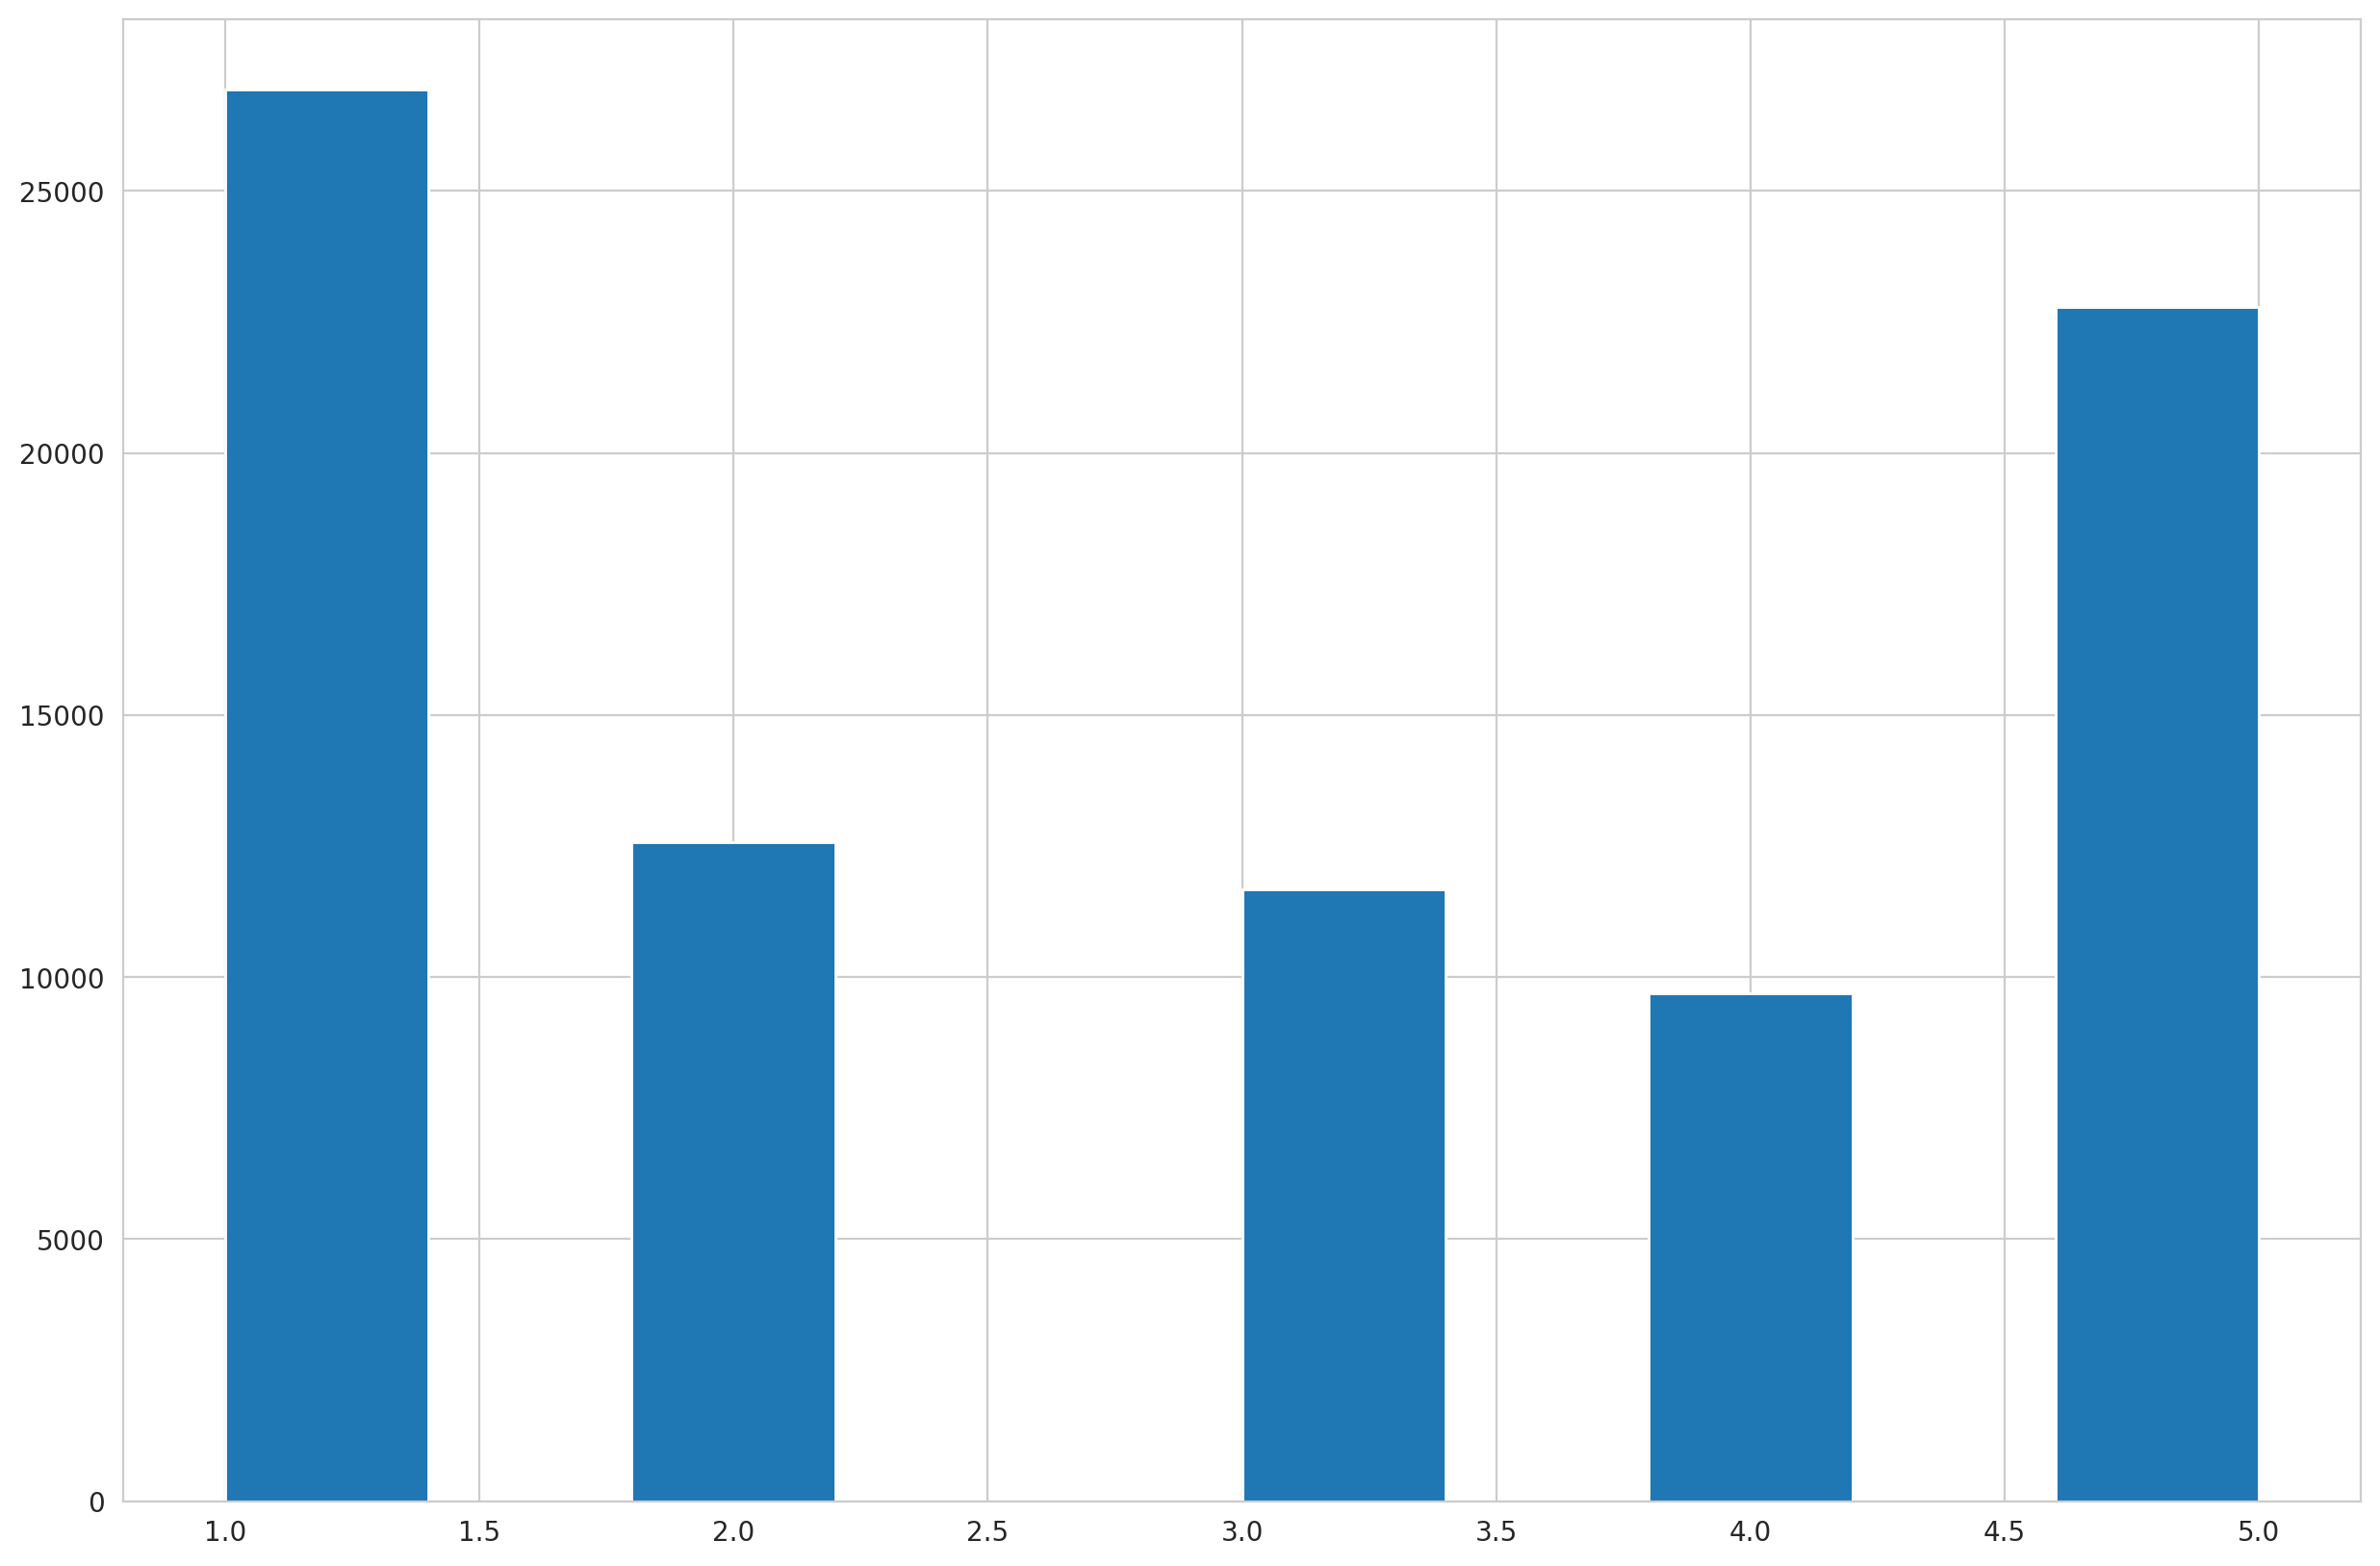

In [10]:
plt.hist(df_googleFit['score'])
plt.show()

In [11]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 28.8 MB/s eta 0:00:00


In [12]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_googleFit['sentiment_polarity'] = df_googleFit['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_googleFit['sentiment_subjective'] = df_googleFit['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [13]:
df_googleFit.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,Bakwas,1,0.000,0.000
1,Nice,3,0.600,1.000
2,It's accuracy not satisfactory,1,0.000,0.000
3,Usefill app,5,0.000,0.000
4,Some times note working,5,0.000,0.000
...,...,...,...,...
83651,Want to see where this goes. Should be interesting. Giving 4 stars for now since I get a 404 error when going to the website. Will be useful if/when I can get an Android wear device.,4,0.400,0.250
83652,Happy to see more information about my daily exercise routines. Very nice addition to AW,5,0.520,0.625
83653,"Excellent, already have done 10 steps :)",5,0.750,1.000
83654,It's Google so 5 stars :p,5,0.750,1.000


## Lowercasing

In [18]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_googleFit['content'] = df_googleFit['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_googleFit['content'][48338])
print(df_googleFit['content'][23456])
print(df_googleFit['content'][77777])

Difficult and doesnt sync. It connects to the other apps I use, but it doesn't sync at all so I have to manually input all of the information in this app. What's the point? I need this app to connect to Wellable but it won't sync to that either. Waste of time.
Don't know but it is not the one basic function this app has to do. Track physical activity. Turned on all required permissions but still it won't track any steps or heart point. If manual starting the activity. For example walking. It will show the walk details but still Nada in steps or heart point. I think the last update broke it. Really disappointed
App ruined phone responsiveness. It continuously monitors your activities using many of the sensors on your phone. The end result is inaccurate data, poor phone performance (slow, sluggish) and poor battery life. Do yourself a favor and use another app that tracks your activities only when requested.


In [19]:
#Lowercase all reviews to see the difference
df_googleFit['content']= df_googleFit['content'].apply(lambda x: x.lower())
print(df_googleFit['content'][48338])
print(df_googleFit['content'][12345])
print(df_googleFit['content'][20100])

difficult and doesnt sync. it connects to the other apps i use, but it doesn't sync at all so i have to manually input all of the information in this app. what's the point? i need this app to connect to wellable but it won't sync to that either. waste of time.
showing less than half steps than done, also not showing actual heart points
good help!


##Stopwords Removal
Indonesian Stopwords

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
english_stopwords = stopwords.words('english')

# Display first 20 stopwords
print(english_stopwords[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_googleFit['wordCount'] = [len(review.split()) for review in df_googleFit['content']]
df_googleFit['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_googleFit['content']]
df_googleFit['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_googleFit['content']]

In [24]:
df_googleFit.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,bakwas,1,0.000,0.000,1,0,0
1,nice,3,0.600,1.000,1,0,0
2,it's accuracy not satisfactory,1,0.000,0.000,4,0,1
3,usefill app,5,0.000,0.000,2,0,0
4,some times note working,5,0.000,0.000,4,0,0
...,...,...,...,...,...,...,...
83651,want to see where this goes. should be interesting. giving 4 stars for now since i get a 404 error when going to the website. will be useful if/when i can get an android wear device.,4,0.400,0.250,36,0,5
83652,happy to see more information about my daily exercise routines. very nice addition to aw,5,0.520,0.625,15,0,1
83653,"excellent, already have done 10 steps :)",5,0.750,1.000,7,0,3
83654,it's google so 5 stars :p,5,0.750,1.000,6,0,2


In [25]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_googleFit['sentiment_rating'] = df_googleFit['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [26]:
df_googleFit.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,bakwas,1,0.000,0.000,Negative
1,nice,3,0.600,1.000,Neutral
2,it's accuracy not satisfactory,1,0.000,0.000,Negative
3,usefill app,5,0.000,0.000,Positive
4,some times note working,5,0.000,0.000,Positive
...,...,...,...,...,...
83651,want to see where this goes. should be interesting. giving 4 stars for now since i get a 404 error when going to the website. will be useful if/when i can get an android wear device.,4,0.400,0.250,Positive
83652,happy to see more information about my daily exercise routines. very nice addition to aw,5,0.520,0.625,Positive
83653,"excellent, already have done 10 steps :)",5,0.750,1.000,Positive
83654,it's google so 5 stars :p,5,0.750,1.000,Positive


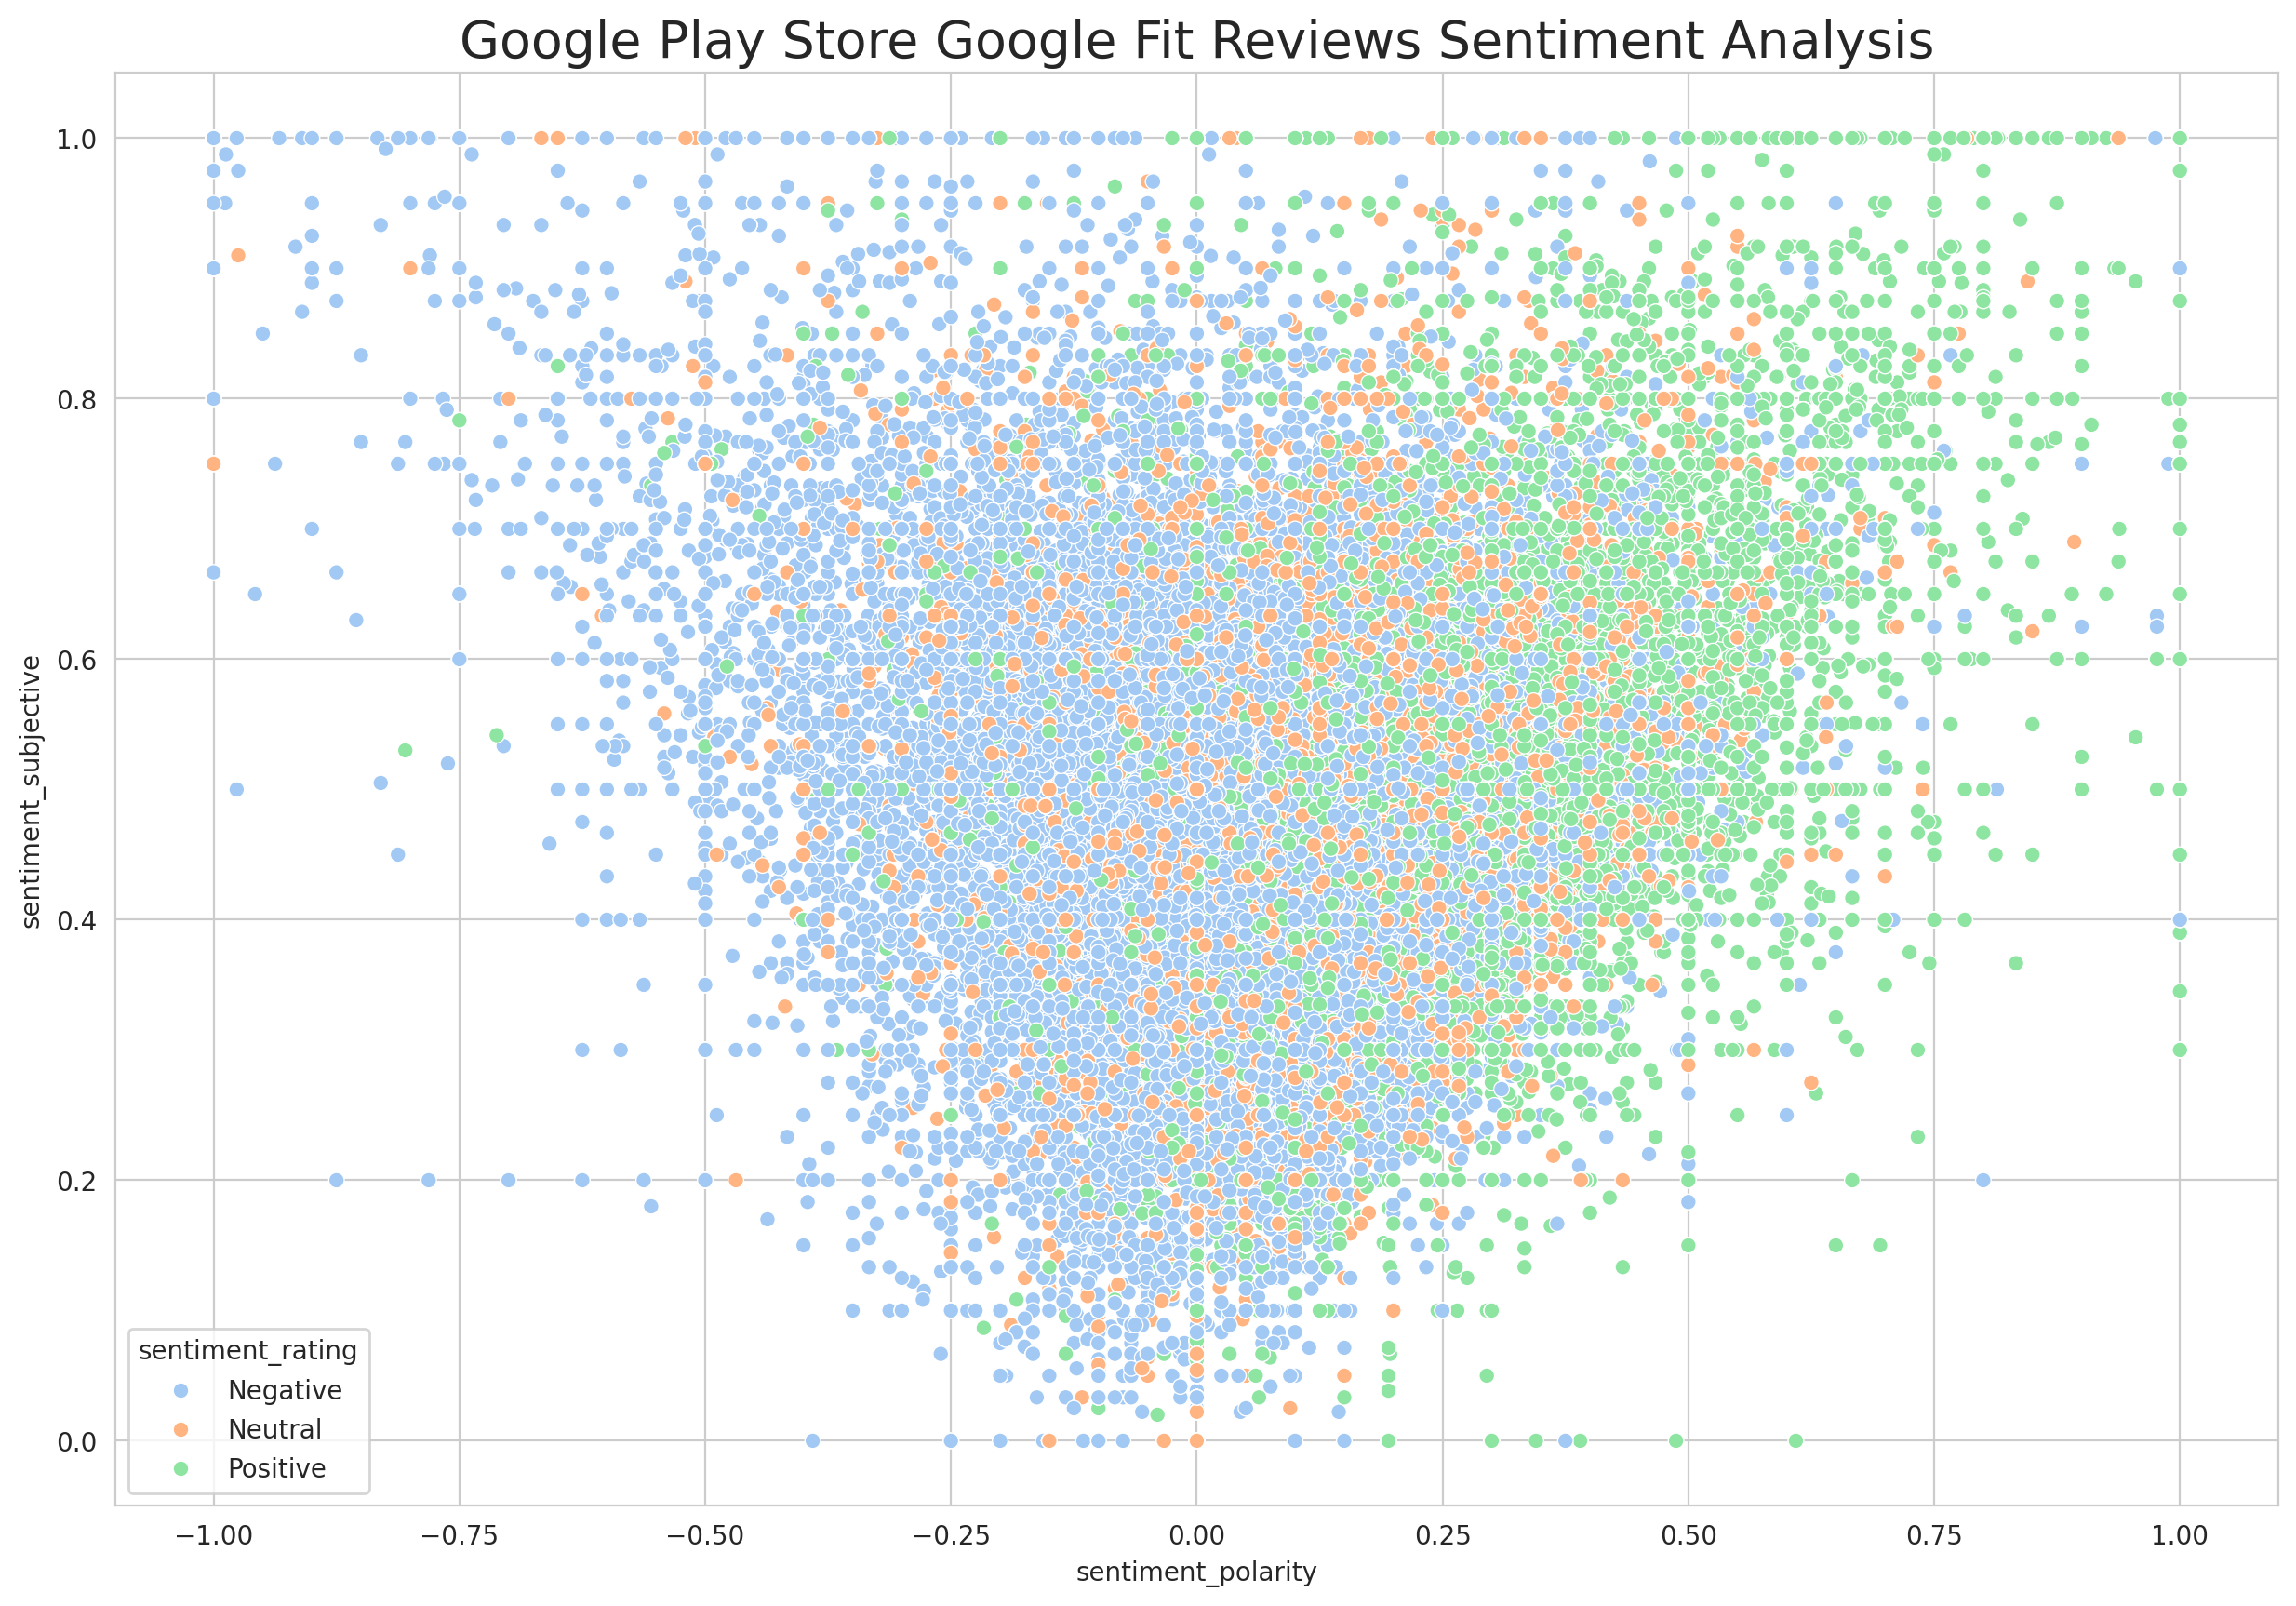

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_googleFit['sentiment_polarity'], y=df_googleFit['sentiment_subjective'],
                hue=df_googleFit['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Google Fit Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [28]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-28-6f9223a4813b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


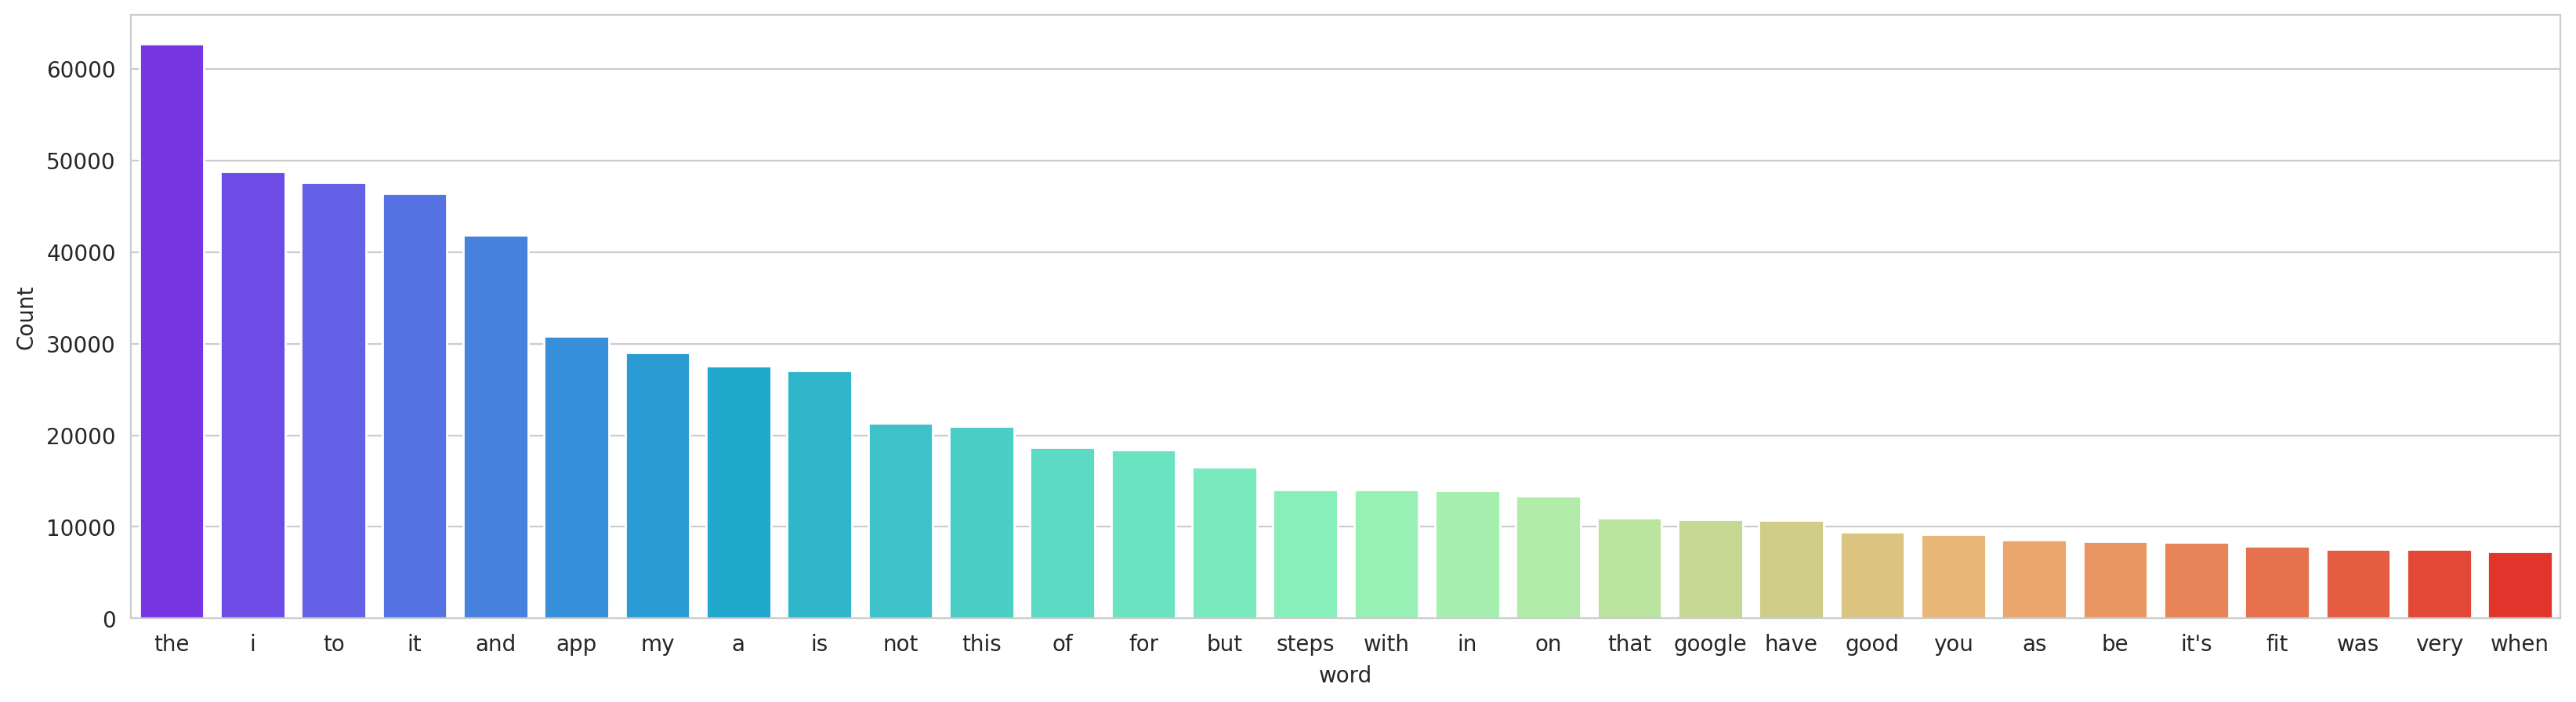

In [29]:
freq_words(df_googleFit['content'])

In [34]:
from collections import Counter

word_counts = Counter(df_googleFit['content'])
common_words = word_counts.most_common(100)

common_words

[('good', 2227),
 ('nice', 697),
 ('good app', 419),
 ('excellent', 396),
 ('very good', 332),
 ('nice app', 326),
 ('awesome', 323),
 ('great', 307),
 ('ok', 262),
 ('great app', 248),
 ('love it', 211),
 ('best', 153),
 ('super', 150),
 ('very good app', 122),
 ('very nice', 114),
 ('best app', 102),
 ('excellent app', 87),
 ('amazing', 77),
 ('cool', 75),
 ('awesome app', 70),
 ('very nice app', 67),
 ('superb', 67),
 ('useful', 63),
 ('not accurate', 63),
 ('👍', 63),
 ('very useful', 62),
 ('i love it', 52),
 ('not working', 51),
 ('not working properly', 48),
 ('perfect', 48),
 ('loved it', 46),
 ('fantastic', 45),
 ('fine', 43),
 ('bad', 43),
 ('wow', 43),
 ('i like it', 42),
 ('good one', 42),
 ('not bad', 39),
 ('helpful', 38),
 ('worst app', 38),
 ('love it!', 36),
 ('love this app', 36),
 ('good 👍', 34),
 ('easy to use', 34),
 ('good application', 34),
 ('i love this app', 34),
 ('inaccurate', 33),
 ('amazing app', 33),
 ('useless', 32),
 ('very helpful', 32),
 ('wonderful', 

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


#Week 1 Done

In [ ]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
df_jknrev['content'] = df_jknrev['content'].apply(lambda x: stopword_remover.remove(x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_jknrev is your DataFrame and 'content' is the column
df_jknrev['content'] = df_jknrev['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_jknrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,"daftar pakai otp, otp nya udh dicoba pulahan kali beberapa nomer gak masuk",1,0.0,0.0,Negative
1,"bagua aplikasinya, semoga ditingkatkan pelayanannya, rumah sakit puskesmas faskes mudah mendapatkan dana bpjs melayani masyarakat",5,0.0,0.0,Positive
2,"waktu estimasi menunggu bodoh banget ampe 3 jam, baru 30 menit nomor antrian gw skip, gak didahuluin. nunggu awal",1,0.0,0.0,Negative
3,"setipa verifikasi otp gagal terus, alasannya koneksi offline, padahal internet kenceng. di perbaiki, mau pindah faskes jadi ga bisa. makasih",1,0.0,0.0,Negative
4,"mau bikin akun susah bangett, kode otp nomer handphone ngga dapet mulu😤",2,0.0,0.0,Negative
...,...,...,...,...,...
26683,semoga bulan penuh rahmah amal ibadah diterima allah swt. bagi developer pihak2 yg membantu proses pengembangan aplikasi mendapatkan pahala. amiiin,5,0.0,0.0,Positive
26684,nice,5,0.6,1.0,Positive
26685,sip mantapsssss....,5,0.0,0.0,Positive
26686,sangat informatif dapat membantu masyarakat.,5,0.0,0.0,Positive


In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-56-4d03cb5e9bb2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


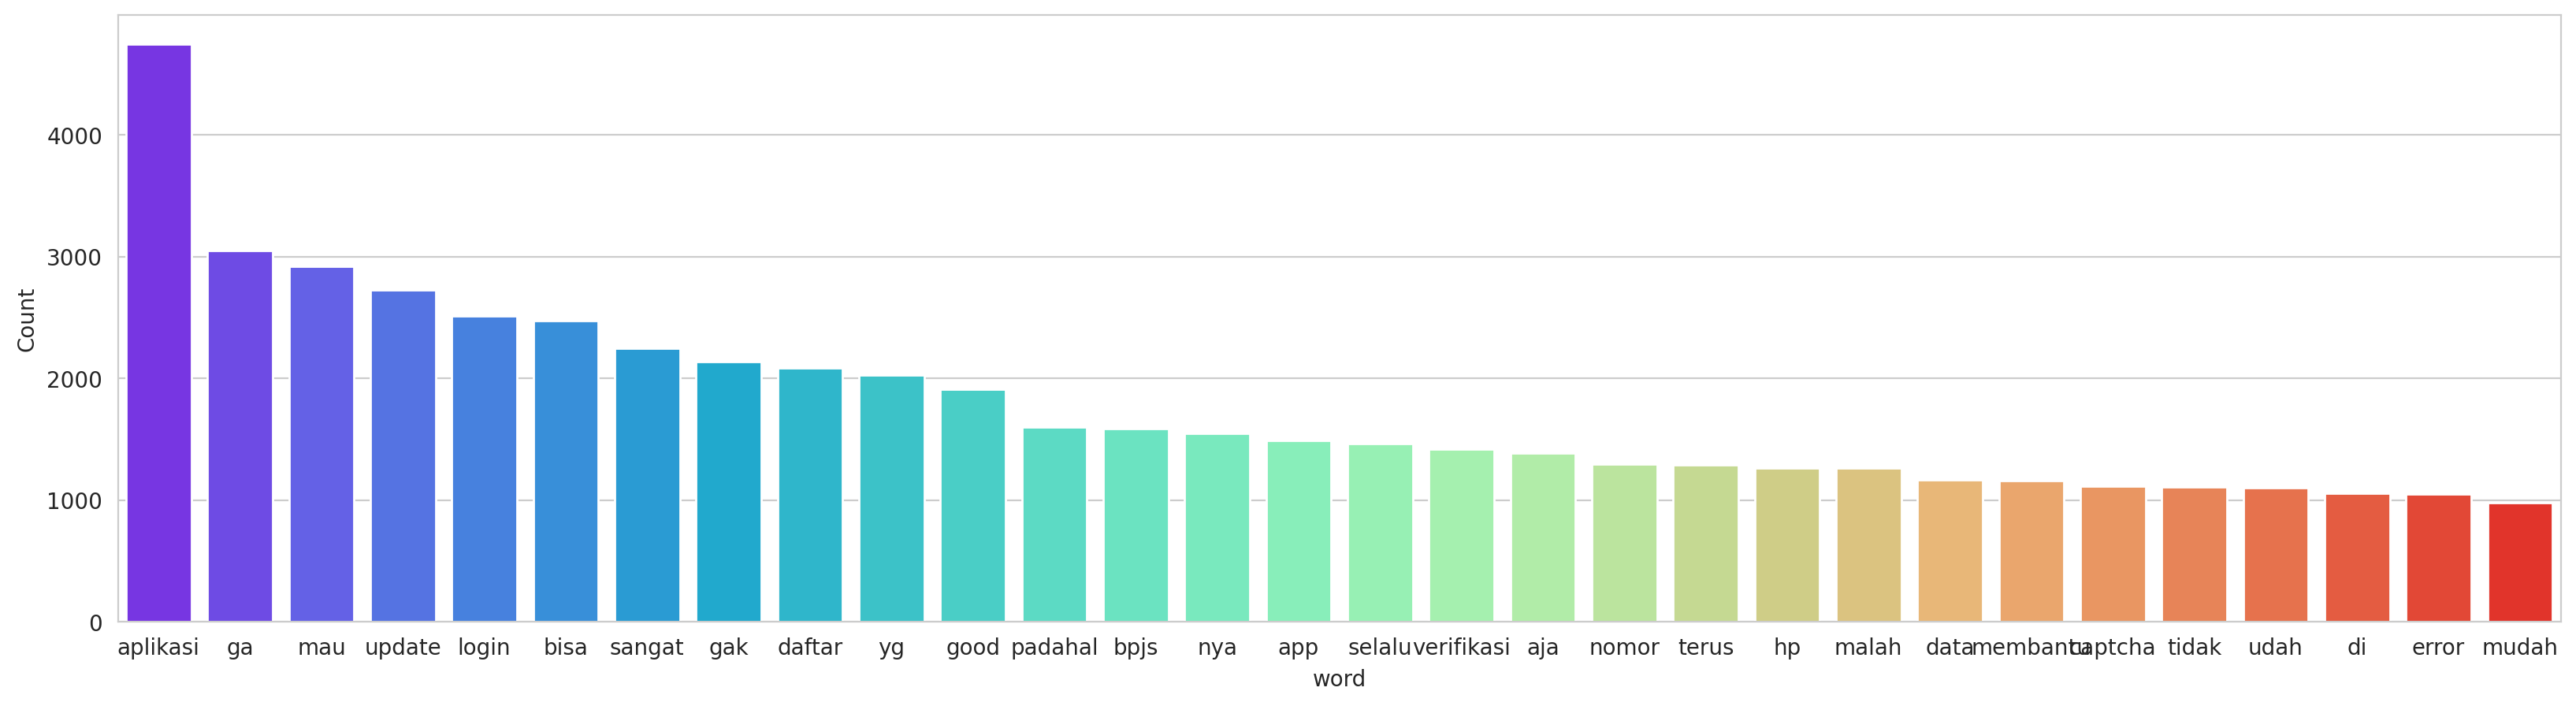

In [ ]:
freq_words(df_jknrev['content'])

In [ ]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_jknrev_stopwords['wordCount'] = [len(review.split()) for review in df_jknrev_stopwords['content']]
df_jknrev_stopwords['wordCount_after_stopwords'] = [len(review.split()) for review in df_jknrev_stopwords['review_after_stopwords']]


NameError: name 'df_nhsrev_stopwords' is not defined

## Homework TUGAS 1A

NLP Pipeline:
Tokenization
Lowering
Stopword Removal
Lemmatization
Stemming
Punctuations Removal
Expand Contractions
Spelling Correction
Rare Words Removal
Common Words Removal
